# Trabajo Práctico | Estadística Actuarial | Curso Landro - Del Rosso

#Autores:

<p>Bocchio, Mateo. Registro: 899166.
<p>Fernández Petrillo, Camila. Registro: 899043.
<p>Gorbato, Ezequiel. Registro: 896447.
<p>Huergo, Ian Matias. Registro: 899961.
<p>Rojas, Agustin Silvio. Registro: 896355.
<p>Schneider, Steven. Registro: 900263.


### Instrucciones:
* Realizar todo el trabajo en este notebook. Se puedan usar otros notebooks para hacer pruebas, pero todo el desarrollo deberá quedar plasmado aquí.
* No modificar las celdas que tienen el encabezado:
    ```python
        ### --- ### NO MODIFICAR ESTA CELDA ### --- ###
    ```
* Cada grupo tiene una seed única que les permite generar su serie de tiempo. El valor de la misma se compone de:
    * la suma de los últimos dos números del registro de cada uno de los miembros del grupo.
    ```python
        reg1 = 888888
        reg2 = 888123


        my_seed = 88 + 23
        >>> 111
    ```

In [ ]:
### --- ### NO MODIFICAR ESTA CELDA ### --- ###

try:
    import funciones_tp
except:
    print('Error en el módulo TP.')

Error en el módulo TP.


In [ ]:
# En esta celda puden importar todas las librerías que quieran

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Acá se completa el número de la seed a usar

my_seed = ...

# Acá se completan los registros del grupo

regs = ...

* Para usar la función check_my_seed se le deben pasar como argumentos:
    * seed: int64 - bajo el nombre 'my_seed'
    * listado de registros: list con los valores siendo strings - bajo el nombre de 'regs'
    
    ```python

        regs = ['888888', '888123']

        my_seed = 111
    ```

In [ ]:
### --- ### NO MODIFICAR ESTA CELDA ### --- ###

# En esta celda se chequea que la seed ingresada sea la correcta y, superada esa condición, se genera la serie de tiempo del grupo en la variable 's'.

funciones_tp.check_my_seed(regs, my_seed)

s = funciones_tp.create_random_ts(seed = my_seed)

# Desarrollo


In [49]:
#Que esten ordenados de menor a mayor
reg1 = 896355
reg2 = 896447
reg3 = 899043
reg4 = 899166
reg5 = 899961 
reg6 = 900263


my_seed = 55 + 47 + 43 + 66 + 61 + 63

In [50]:
# Acá se completa el número de la seed a usar

my_seed = 335

# Acá se completan los registros del grupo

regs = ['896355', '896447', '899043', '899166', '899961', '900263']



In [51]:
# MODULO "FUNCIONES_TP" 

import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima_process import arma_generate_sample

def create_random_ts(seed):
    np.random.seed(seed)

    # Seteo los coeficientes
    ar_coefs = np.random.uniform(low= -1.5, high=2.0, size= np.random.choice([1,2])).tolist()
    ma_coefs = np.random.uniform(low= -1.5, high=2.0, size= np.random.choice([1,2])).tolist()

    # Genero los dats
    y = arma_generate_sample(ar_coefs, ma_coefs, nsample=365)
    
    # si la serie tiene una forma que no sirve para el tp la rehago
    i = 1
    while abs(y[0] - y[360]) > 50:

        np.random.seed(seed + i)
        i += 1
        
        ar_coefs = np.random.uniform(low= -1.5, high=2.0, size= np.random.choice([1,2])).tolist()
        ma_coefs = np.random.uniform(low= -1.5, high=2.0, size= np.random.choice([1,2])).tolist()
        
        y = arma_generate_sample(ar_coefs, ma_coefs, nsample=365)
    
    ## selección random de los modificadores:
    modif_seno = np.random.choice([0,1])
    modif_trend = np.random.choice([0,1,2])
    
    ## modificador 1:
    if modif_seno == 1:
        in_array = np.arange(0, 365, 1)
        out_array = np.sin(in_array)
        y = y * out_array

    ## modificador 2:
    if modif_trend == 1:
        lin = np.linspace(0,10,45) + np.random.uniform(1.5, 2.5, 45)
        ones = np.array([1]*(365 - 45))
        lin = np.concatenate((ones, lin), axis=None)

        y = np.concatenate((y[:365 - 45], abs(y[365 - 45:])), axis=None)
        y = y * lin

    ## modificador 3:
    if modif_trend == 2:
        lin = np.linspace(0,20,80) + np.random.uniform(1.5, 3.0, 80)
        ones = np.array([1]*(365 - 80))
        lin = np.concatenate((ones, lin), axis=None)

        y = np.concatenate((y[:365 - 80], abs(y[365 - 80:])), axis=None)
        y = y * lin

    plt.figure(figsize=(9,6))
    plt.plot(y)
    plt.ylabel(r'$y_t$')
    plt.xlabel(r'$t$')
    plt.show()
    
    return y


def check_my_seed(regs, my_seed):
    
    actual_seed = sum([int(reg[-2:]) for reg in regs])
    
    assert actual_seed == my_seed, 'No están usando la seed que les corresponde! Revisen la cuenta!'
    
    print('La seed calculada es correcta!')

#Serie original

##  Gráfico

La seed calculada es correcta!


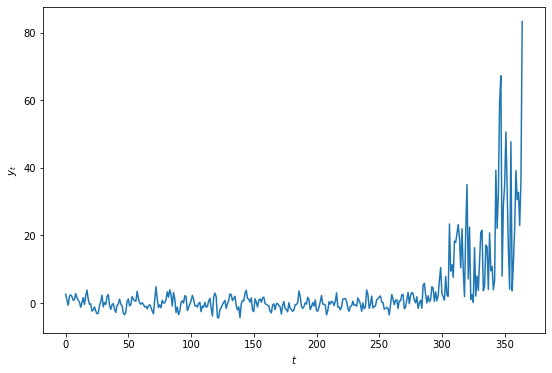

In [52]:
check_my_seed(regs, my_seed)

s = create_random_ts(seed = my_seed)

Se observa gráficamente que la serie es **no estacionaria** en la media

## Analisis descriptivo de la serie


In [53]:
media = np.mean(s)
mediana = np.median(s)
varianza = np.var(s)
desvio = np.std(s)
percentil_10 = np.percentile(s,10)
percentil_25 = np.percentile(s,25)
percentil_75 = np.percentile(s,75)
import scipy
from scipy.stats import kurtosis
from scipy.stats import skew
kurtosis = scipy.stats.kurtosis(s, axis=0)
asimetria = scipy.stats.skew(s,axis=0)
coefdevariabilidad = np.mean(s)/np.std(s)

descriptivam = np.empty((1, 10)) 
descriptivam[0,0] = media
descriptivam[0,1] = mediana
descriptivam[0,2] = varianza
descriptivam[0,3] = desvio
descriptivam[0,4] = percentil_10
descriptivam[0,5] = percentil_25
descriptivam[0,6] = percentil_75
descriptivam[0,7] = kurtosis
descriptivam[0,8] = asimetria
descriptivam[0,9] = coefdevariabilidad

import pandas as pd

descriptiva = pd.DataFrame(descriptivam,columns=["Media","Mediana","Varianza","Desvío","P10","P25","P75","Kurtosis","Asimetría","Coef de variación"],
                           index = ["Serie S"])
descriptiva.round(4)

,Media,Mediana,Varianza,Desvío,P10,P25,P75,Kurtosis,Asimetría,Coef de variación
Serie S,3.395,0.4818,103.9582,10.196,-1.9814,-0.9077,2.336,19.2097,3.9376,0.333


La serie es leptocúrtica, con asimetría positiva. Al ser el coeficiente de variación mayor a 0.1, no se debe considerar la media representativa de la muestra


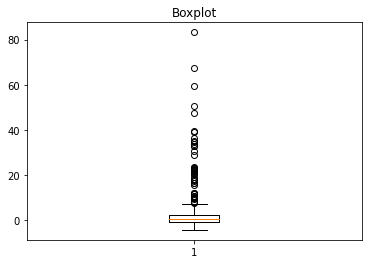

In [54]:
#gráfico de Box-Plot

plt.boxplot(s)
plt.title("Boxplot")
plt.show()

Puede notarse la presencia de valores atípicos, además de una clara asimetría hacia la izquierda.

##FAS, FAC y FACP de la serie original

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:354: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


[103.95824229  67.32914382  57.89591895  59.83197849  63.70126883
  54.42359596  51.21628007  43.49677154  51.23052215  53.01081442
  39.25066166]


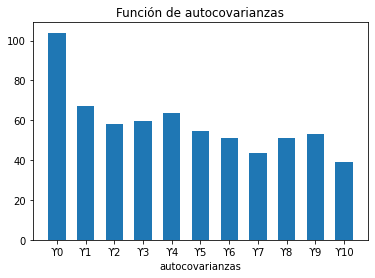

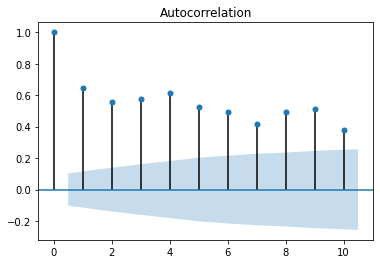

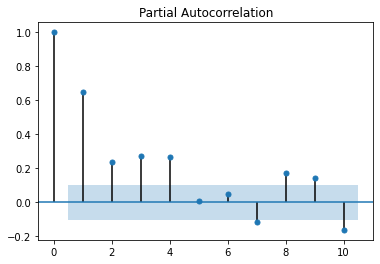

In [55]:
from statsmodels.tsa.stattools import acf, pacf, acovf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Calculamos la FAC, FACP ,y FAS
fac = acf(s, nlags=10)
facp = pacf(s, nlags=10)
fas = acovf(s, nlag=10)
print(fas)


#Gráfico la FAS
a=[i for i in range(len(fas))]
b=['ϒ{}'.format(i) for i in range(len(fas))]
plt.bar(a,fas,tick_label=b,width=0.6)
plt.xlabel('autocovarianzas')
plt.title("Función de autocovarianzas")

plot_acf(s, lags=10)
plot_pacf(s, lags=10)
plt.show()




##Analisis de la estacionariedad de la serie

## Análisis de Media y Varianza

Si la media y varianza son constantes, la serie es estacionaria. De lo contrario, puede ser no estacionaria/explosiva.

In [56]:
## Dividimos los valores de la serie en 2 para ver si los valores de la media y la varianza son los mismos

sdf = pd.DataFrame(s)
X = sdf.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print("Media 1: {} | Media 2: {}".format(mean1, mean2))
print("Var 1: {} | Var 2: {}".format(var1, var2))

Media 1: -0.12493849750100791 | Media 2: 6.895727166182065
Var 1: 3.1764856992344024 | Var 2: 179.6119259104706


Se observa que tanto la media como la varianza no son constantes.

## Test de Dickey-Füller

Test para testear la presencia de una raíz unitaria.

* **Hipótesis**:
    * **H0**: la serie posee una raíz unitaria.
    * **H1**: la serie NO posee una raíz unitaria (es decir, es *estacionaria*)
    
* **P-value**:
    * p-value > 0.05: No rechazo H0 por lo que se puede sostener la hipótesis de presencia de raíz unitaria.
    * p-value <= 0.05: Rechazo la H0; por lo que se puede sostener que no hay ninguna raiz unitaria.

In [57]:
#Analisis de DF, en base a lo visto en la clase de analisis de series de tiempo.

from statsmodels.tsa.stattools import adfuller, kpss

y = s
test_df = adfuller(y)

print('Valor del test: {}'.format(test_df[0]))
print('p-value: {}'.format(test_df[1]))


def test_dick_fuller(serie,alpha):
    test = adfuller(serie)
    dkf, pv = test[0], test[1]
    
    if pv > alpha:
        print("El p-value ({}) es mayor que el alpha ({}).".format(pv,alpha))
        print("NO rechazo H0.")
        
    else:
        print("El p-value ({}) es menor que el alpha ({}).".format(pv,alpha))
        print("Rechazo H0.")
    
    return dkf, pv

test_dick_fuller(y, alpha = 0.05)

Valor del test: 2.983917287272448
p-value: 1.0
El p-value (1.0) es mayor que el alpha (0.05).
NO rechazo H0.


(2.983917287272448, 1.0)

## Analisis de residuos

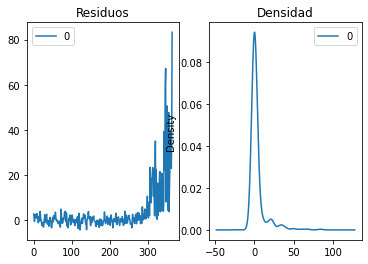

In [58]:
# Plot residual errors
residuals = pd.DataFrame(s)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuos", ax=ax[0])
residuals.plot(kind='kde', title='Densidad', ax=ax[1])
plt.show()

#Diferenciación de la serie

In [59]:
# create a differenced series
def difference(s, interval=1):
    diff = list()
    for i in range(interval, len(s)):
        value = s[i] - s[i - interval]
        diff.append(value)
    return diff


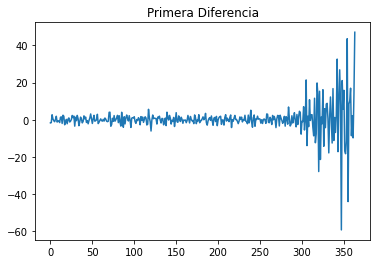

In [60]:
#Primera diferencia de la serie
diff = difference(s)
plt.title("Primera Diferencia")
plt.plot(diff)
plt.show()


Se observa con el grafico de la serie que al realizar la diferencia primera al proceso, este se convierte en **estacionario**, ya que ahora posee media constante (se comporta como un *white noise*). Se pierde una observacion.

Comprobamos la condición de estacionariedad a partir del análisis de los graficos de la FAC y la FACP

In [61]:
desvio = np.std(diff)
print(desvio)

7.475249554964587


El desvio sigue siendo muy alto, y además se puede observar graficamente que la serie puede no ser estacionaria en la varianza: hay un problema de heteroselasticidad. Se podria aplicar una tranformacion a la serie para convertirla en estacionaria en la varianza. **Limitacion **

##FAS, FAC Y FACP de la serie diferenciada

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:354: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


[ 55.87935591 -16.97797678  -8.49874392  -4.09487016  13.64103404
  -8.00227196   8.22664357 -13.27980136   7.82207273   5.89362587
  -7.739891    -8.85278828   9.14019228  -4.03200045   2.60077579
   2.09686614  -3.59317359   0.55517668  -1.8346104    2.90378643
   0.19543902]


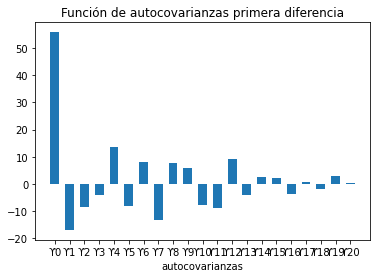

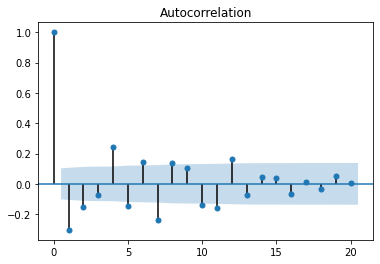

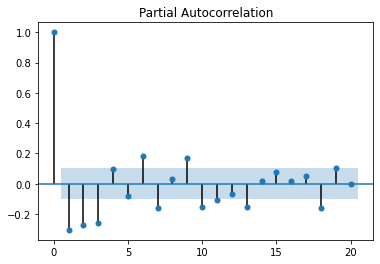

In [62]:
from statsmodels.tsa.stattools import acf, pacf, acovf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Calculamos la FAC, FACP ,y FAS
fac = acf(diff, nlags=20)
facp = pacf(diff, nlags=20)
fas = acovf(diff, nlag=20)
print(fas)


#Gráfico la FAS
a=[i for i in range(len(fas))]
b=['ϒ{}'.format(i) for i in range(len(fas))]
plt.bar(a,fas,tick_label=b,width=0.6)
plt.xlabel('autocovarianzas')
plt.title("Función de autocovarianzas primera diferencia")

plot_acf(diff, lags=20)
plot_pacf(diff, lags=20)
plt.show()

Se observa que la función de autocorrelaciones (FAC) del proceso diferenciado, posee un comportamiento con forma sinusoidal decreciente, lo que indica estacionariedad de la serie. 


De esta forma, finaliza el análisis grafico sobre la condición de estacionariedad del proceso en su primera diferencia.

##Test de Dickey Fuller de la primera diferencia

In [63]:
#Test de DF para la primera diferencia

x = diff
test_df = adfuller(x)

print('Valor del test: {}'.format(test_df[0]))
print('p-value: {}'.format(test_df[1]))


def test_dick_fuller(serie,alpha):
    test = adfuller(serie)
    dkf, pv = test[0], test[1]
    
    if pv > alpha:
        print("El p-value ({}) es mayor que el alpha ({}).".format(pv,alpha))
        print("NO rechazo H0.")
        
    else:
        print("El p-value ({}) es menor que el alpha ({}).".format(pv,alpha))
        print("Rechazo H0.")
    
    return dkf, pv

test_dick_fuller(x, alpha = 0.05)

Valor del test: -6.1715175970750895
p-value: 6.787241622863207e-08
El p-value (6.787241622863207e-08) es menor que el alpha (0.05).
Rechazo H0.


(-6.1715175970750895, 6.787241622863207e-08)

#Estimación del mejor modelo 


##Estimación ARIMA (1,1,1)

In [64]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(s, order=(1,1,1))
model_fit1 = model.fit(disp=0)
print(model_fit1.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1194.911
Method:                       css-mle   S.D. of innovations              6.440
Date:                Wed, 06 Jul 2022   AIC                           2397.821
Time:                        02:13:27   BIC                           2413.410
Sample:                             1   HQIC                          2404.017
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1054      0.065      1.614      0.107      -0.023       0.233
ar.L1.D.y      0.2088      0.074      2.804      0.005       0.063       0.355
ma.L1.D.y     -0.8501      0.043    -19.758      0.0

###Significatividad de los coeficientes ARIMA(1,1,1)




In [65]:
coef_1 = np.dataframe = [ 0.1054 , 0.2088 , -0.8501 ]
desv_coef_1 = np.dataframe = [ 0.065 , 0.074 , 0.043 ]

t_empirico_1 = np.dataframe = [0.1054/0.065 , 0.2088/0.074 , 0.8501/0.043]
 

for i in range(0, len(t_empirico_1)):
        test = t_empirico_1[i]
        if (abs(test) >= 2):
           print("El parametro {} es significativo".format(coef_1[i]))
        else:
          print("El parametro {} NO es significativo".format(coef_1[i])) 




El parametro 0.1054 NO es significativo
El parametro 0.2088 es significativo
El parametro -0.8501 es significativo


##Estimación ARIMA (1,2,1)

In [66]:
model = ARIMA(s, order=(1,2,1))
model_fit2 = model.fit(disp=0)
print(model_fit2.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  363
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -1228.591
Method:                       css-mle   S.D. of innovations              7.075
Date:                Wed, 06 Jul 2022   AIC                           2465.181
Time:                        02:13:29   BIC                           2480.759
Sample:                             2   HQIC                          2471.373
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0030      0.003      1.152      0.250      -0.002       0.008
ar.L1.D2.y    -0.3389      0.052     -6.458      0.000      -0.442      -0.236
ma.L1.D2.y    -1.0000      0.008   -131.269      0.0

###Significatividad de sus coeficientes ARIMA (1,2,1)

In [67]:
coef_2 = np.dataframe = [ 0.0030 , -0.3389, -1 ]
desv_coef_2 = np.dataframe = [ 0.003 , 0.052 , 0.008 ]

t_empirico_2 = np.dataframe = [ 0.0030/0.003 , 0.3389/0.052 , 1/0.008 ]
 


for i in range(0, len(t_empirico_2)):
        test = t_empirico_2[i]
        if (abs(test) >= 2):
          print("El parametro {} es significativo".format(coef_2[i]))
        else:
          print("El parametro {} NO es significativo".format(coef_2[i])) 



El parametro 0.003 NO es significativo
El parametro -0.3389 es significativo
El parametro -1 es significativo


##Estimación ARIMA (4,1,3)

In [68]:
model = ARIMA(s, order=(4,1,3))
model_fit2 = model.fit(disp=0)
print(model_fit2.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -1168.800
Method:                       css-mle   S.D. of innovations              5.980
Date:                Wed, 06 Jul 2022   AIC                           2355.600
Time:                        02:13:31   BIC                           2390.675
Sample:                             1   HQIC                          2369.541
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1082      0.071      1.516      0.130      -0.032       0.248
ar.L1.D.y     -1.2246      0.122    -10.045      0.000      -1.464      -0.986
ar.L2.D.y     -0.6088      0.213     -2.864      0.0

###Significatividad de sus coeficientes. ARIMA (4,1,3)

In [69]:
coef_3 = np.dataframe = [ 0.1082, -1.2246, -0.6088, 0.0214, 0.0668, 0.7029, -0.3330, -0.7595 ]

t_empirico_3 = np.dataframe = [ 0.1082/0.071 , 1.2246/0.122 , 0.6088/0.213 , 0.0214/0.2 , 0.0668/0.102 , 0.7029/0.106 , 0.333/0.138 , 0.7595/0.083]
 

for i in range(0, len(t_empirico_3)):
        test = t_empirico_3[i]
        if (abs(test) >= 2):
          print("El parametro {} es significativo".format(coef_3[i]))
        else:
          print("El parametro {} NO es significativo".format(coef_3[i]))  
        


El parametro 0.1082 NO es significativo
El parametro -1.2246 es significativo
El parametro -0.6088 es significativo
El parametro 0.0214 NO es significativo
El parametro 0.0668 NO es significativo
El parametro 0.7029 es significativo
El parametro -0.333 es significativo
El parametro -0.7595 es significativo


##Estimación ARIMA (0,1,0)

In [70]:
#Aca probamos otros ARIMA:
model = ARIMA(s, order=(0,1,0))
model_fit2 = model.fit(disp=0)
print(model_fit2.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1248.715
Method:                           css   S.D. of innovations              7.475
Date:                Wed, 06 Jul 2022   AIC                           2501.430
Time:                        02:13:31   BIC                           2509.225
Sample:                             1   HQIC                          2504.528
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2216      0.392      0.566      0.572      -0.546       0.990


###Significatividad de sus coeficientes. ARIMA (0,1,0)

In [71]:
coef_4 = np.dataframe = [ 0.2216]
t_empirico_4 = np.dataframe = [0.2216/0.392]
 

for i in range(0, len(t_empirico_4)):
        test = t_empirico_4[i]
        if (abs(test) > 2):
          print("El parametro {} es significativo".format(coef_4[i]))
        else:
          print("El parametro {} NO es significativo".format(coef_4[i]))  
        

El parametro 0.2216 NO es significativo


##Estimación ARIMA (2,1,1)

In [72]:
model = ARIMA(s, order=(2,1,1))
model_fit2 = model.fit(disp=0)
print(model_fit2.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1192.894
Method:                       css-mle   S.D. of innovations              6.406
Date:                Wed, 06 Jul 2022   AIC                           2395.788
Time:                        02:13:31   BIC                           2415.274
Sample:                             1   HQIC                          2403.533
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1236      0.103      1.202      0.230      -0.078       0.325
ar.L1.D.y      0.0252      0.119      0.211      0.833      -0.209       0.259
ar.L2.D.y     -0.2096      0.085     -2.464      0.0

###Significatividad de sus coeficientes. ARIMA (2,1,1)

In [73]:
coef_5 = np.dataframe = [ 0.1236 , 0.0252 , -0.2096 , -0.6411]

t_empirico_5 = np.dataframe = [ 0.1236/0.103 , 0.0252/0.119 , 0.2096/0.085 , 0.6411/0.120]
 

for i in range(0, len(t_empirico_5)):
        test = t_empirico_5[i]
        if (abs(test) > 2):
          print("El parametro {} es significativo".format(coef_5[i]))
        else:
          print("El parametro {} NO es significativo".format(coef_5[i]))  

El parametro 0.1236 NO es significativo
El parametro 0.0252 NO es significativo
El parametro -0.2096 es significativo
El parametro -0.6411 es significativo


##Estimación ARIMA(3,1,2)

In [74]:
model = ARIMA(s, order=(3,1,2))
model_fit2 = model.fit(disp=0)
print(model_fit2.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1182.490
Method:                       css-mle   S.D. of innovations              6.224
Date:                Wed, 06 Jul 2022   AIC                           2378.980
Time:                        02:13:32   BIC                           2406.260
Sample:                             1   HQIC                          2389.823
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1378      0.126      1.096      0.274      -0.109       0.384
ar.L1.D.y     -0.8895      0.103     -8.643      0.000      -1.091      -0.688
ar.L2.D.y     -0.4821      0.123     -3.917      0.0

###Significatividad coeficientes. ARIMA (3,1,2)

In [75]:
coef_6 = np.dataframe = [ 0.1378 , -0.8895 , -0.4821 , -0.4232 , 0.3311 , -0.2596]

t_empirico_6 = np.dataframe = [ 0.1378/0.126 , 0.8895/0.103 , 0.4821/0.123 , 0.4232/0.064 , 0.3311/0.114 , 0.25960/0.097]

for i in range(0, len(t_empirico_6)):
        test = t_empirico_6[i]
        if (abs(test) > 2):
          print("El parametro {} es significativo".format(coef_6[i]))
        else:
          print("El parametro {} NO es significativo".format(coef_6[i]))  

El parametro 0.1378 NO es significativo
El parametro -0.8895 es significativo
El parametro -0.4821 es significativo
El parametro -0.4232 es significativo
El parametro 0.3311 es significativo
El parametro -0.2596 es significativo


Podemos observar que con esta serie de tiempo, los modelos ARIMA con d=1 tienen menor AIC, BIC y HQ. Por lo tanto el proceso es Integrado de orden 1, es decir, posee una única raíz unitaria. Ademas, el test de DF brindo la evidencia necesaria para indicar que existe al menos una raiz unitaria. Podriamos realizar la primera diferencia para convertirlo en estacionario.



# Predicción

## Gráfico

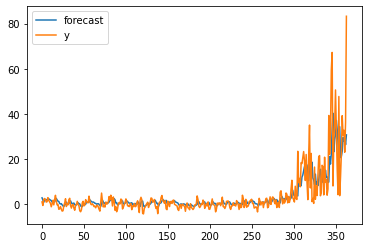

In [76]:
model_fit1.plot_predict(dynamic=False)
plt.show()

## Predictores

Por default, la función .forecast() utiliza una confianza del 95%

### Para *l* = 1

In [77]:
import statsmodels.api as sm

# TRAEMOS EL MODELO ESTIMADO
mod = model = ARIMA(s, order=(4,1,3))
res = mod.fit()

l = 1
t1 = res.forecast(steps = l)[0][0]

print("El valor de la serie en t + 1 es", round(t1,4))



El valor de la serie en t + 1 es 47.2047


### Para *l* = 2

In [78]:
i = 1
l = 2
t = []

for i in range(1,3):
  t.append(res.forecast(steps = i)[0])

print(
    "El valor de la serie en t + 1 es", round(t[0][0],4),
    "\nEl valor de la serie en t + 2 es", round(t[1][1],4),
    )

El valor de la serie en t + 1 es 47.2047 
El valor de la serie en t + 2 es 62.6832


### Para *l* = 5

In [79]:
i = 1
l = 5
t = []

for i in range(1,6):
  t.append(res.forecast(steps = i)[0])

print(
    "El valor de la serie en t + 1 es", round(t[0][0],4),
    "\nEl valor de la serie en t + 2 es", round(t[1][1],4),
    "\nEl valor de la serie en t + 3 es", round(t[2][2],4),
    "\nEl valor de la serie en t + 4 es", round(t[3][3],4),
    "\nEl valor de la serie en t + 5 es", round(t[4][4],4)
    )

El valor de la serie en t + 1 es 47.2047 
El valor de la serie en t + 2 es 62.6832 
El valor de la serie en t + 3 es 72.8735 
El valor de la serie en t + 4 es 48.0026 
El valor de la serie en t + 5 es 34.3688


### Para *l* = 10

In [80]:
i = 1
l = 10
t = []

for i in range(1,11):
  t.append(res.forecast(steps = i)[0])

print(
    "El valor de la serie en t + 1 es", round(t[0][0],4),
    "\nEl valor de la serie en t + 2 es", round(t[1][1],4),
    "\nEl valor de la serie en t + 3 es", round(t[2][2],4),
    "\nEl valor de la serie en t + 4 es", round(t[3][3],4),
    "\nEl valor de la serie en t + 5 es", round(t[4][4],4),
    "\nEl valor de la serie en t + 6 es", round(t[5][5],4),
    "\nEl valor de la serie en t + 7 es", round(t[6][6],4),
    "\nEl valor de la serie en t + 8 es", round(t[7][7],4),
    "\nEl valor de la serie en t + 9 es", round(t[8][8],4),
    "\nEl valor de la serie en t + 10 es", round(t[9][9])
    )

El valor de la serie en t + 1 es 47.2047 
El valor de la serie en t + 2 es 62.6832 
El valor de la serie en t + 3 es 72.8735 
El valor de la serie en t + 4 es 48.0026 
El valor de la serie en t + 5 es 34.3688 
El valor de la serie en t + 6 es 44.136 
El valor de la serie en t + 7 es 40.777 
El valor de la serie en t + 8 es 39.6847 
El valor de la serie en t + 9 es 42.6628 
El valor de la serie en t + 10 es 41


## Intervalos de Confianza

### Para *l* = 1

#### Confianza 95%

In [81]:
l = 1
ic1_5 = res.forecast(steps = l)[2]

print("El Intervalo de Confianza de la serie en t + 1, con un alpha de 5%, es: ", ic1_5)

El Intervalo de Confianza de la serie en t + 1, con un alpha de 5%, es:  [[35.48366247 58.9257    ]]


#### Confianza 97,5%

In [82]:
l = 1
ic1_975 = res.forecast(steps = l, alpha = 0.025)[2]

print("El Intervalo de Confianza de la serie en t + 1, con un alpha de 2.5%, es: ", ic1_975)

El Intervalo de Confianza de la serie en t + 1, con un alpha de 2.5%, es:  [[33.80059645 60.60876603]]


#### Confianza 99%

In [83]:
l = 1
ic1_99 = res.forecast(steps = l, alpha = 0.01)[2]

print("El Intervalo de Confianza de la serie en t + 1, con un alpha de 1%, es: ", ic1_99)

El Intervalo de Confianza de la serie en t + 1, con un alpha de 1%, es:  [[31.80065145 62.60871103]]


### Para *l* = 2

#### Confianza 95%

In [84]:
i = 1
l = 2
ic2 = []

for i in range(1,3):
  ic2.append(res.forecast(steps = i, alpha = 0.05)[2])

print(
    "El Intervalo de Confianza de la serie en t + 1, con un alpha de 5%, es: ", ic2[0][0],
    "\nEl Intervalo de Confianza de la serie en t + 2, con un alpha de 5%, es: ", ic2[1][1],
    )

El Intervalo de Confianza de la serie en t + 1, con un alpha de 5%, es:  [35.48366247 58.9257    ] 
El Intervalo de Confianza de la serie en t + 2, con un alpha de 5%, es:  [49.69032371 75.67598785]


#### Confianza 97.5%

In [85]:
i = 1
l = 2
ic2 = []

for i in range(1,3):
  ic2.append(res.forecast(steps = i, alpha = 0.025)[2])

print(
    "El Intervalo de Confianza de la serie en t + 1, con un alpha de 2.5%, es: ", ic2[0][0],
    "\nEl Intervalo de Confianza de la serie en t + 2, con un alpha de 2.5%, es: ", ic2[1][1],
    )

El Intervalo de Confianza de la serie en t + 1, con un alpha de 2.5%, es:  [33.80059645 60.60876603] 
El Intervalo de Confianza de la serie en t + 2, con un alpha de 2.5%, es:  [47.82463314 77.54167842]


#### Confianza 99%

In [86]:
i = 1
l = 2
ic2 = []

for i in range(1,3):
  ic2.append(res.forecast(steps = i, alpha = 0.01)[2])

print(
    "El Intervalo de Confianza de la serie en t + 1, con un alpha de 1%, es: ", ic2[0][0],
    "\nEl Intervalo de Confianza de la serie en t + 2, con un alpha de 1%, es: ", ic2[1][1],
    )

El Intervalo de Confianza de la serie en t + 1, con un alpha de 1%, es:  [31.80065145 62.60871103] 
El Intervalo de Confianza de la serie en t + 2, con un alpha de 1%, es:  [45.60767999 79.75863158]


### Para *l* = 5

#### Confianza 95%

In [87]:
i = 1
l = 5
t = []

for i in range(1,6):
  t.append(res.forecast(steps = i, alpha = 0.05)[2])

print(
    "El Intervalo de Confianza de la serie en t + 1, con un alpha de 5%, es: ", t[0][0],
    "\nEl Intervalo de Confianza de la serie en t + 2, con un alpha de 5%, es: ", t[1][1],
    "\nEl Intervalo de Confianza de la serie en t + 3, con un alpha de 5%, es: ", t[2][2],
    "\nEl Intervalo de Confianza de la serie en t + 4, con un alpha de 5%, es: ", t[3][3],
    "\nEl Intervalo de Confianza de la serie en t + 5, con un alpha de 5%, es: ", t[4][4]
    )

El Intervalo de Confianza de la serie en t + 1, con un alpha de 5%, es:  [35.48366247 58.9257    ] 
El Intervalo de Confianza de la serie en t + 2, con un alpha de 5%, es:  [49.69032371 75.67598785] 
El Intervalo de Confianza de la serie en t + 3, con un alpha de 5%, es:  [59.71903436 86.02793528] 
El Intervalo de Confianza de la serie en t + 4, con un alpha de 5%, es:  [34.76562301 61.23957941] 
El Intervalo de Confianza de la serie en t + 5, con un alpha de 5%, es:  [20.21918718 48.51840432]


#### Confianza 97.5%

In [88]:
i = 1
l = 5
t = []

for i in range(1,6):
  t.append(res.forecast(steps = i,alpha = 0.025)[2])

print(
    "El Intervalo de Confianza de la serie en t + 1, con un alpha de 2.5%, es: ", t[0][0],
    "\nEl Intervalo de Confianza de la serie en t + 2, con un alpha de 2.5%, es: ", t[1][1],
    "\nEl Intervalo de Confianza de la serie en t + 3, con un alpha de 2.5%, es: ", t[2][2],
    "\nEl Intervalo de Confianza de la serie en t + 4, con un alpha de 2.5%, es: ", t[3][3],
    "\nEl Intervalo de Confianza de la serie en t + 5, con un alpha de 2.5%, es: ", t[4][4]
    )

El Intervalo de Confianza de la serie en t + 1, con un alpha de 2.5%, es:  [33.80059645 60.60876603] 
El Intervalo de Confianza de la serie en t + 2, con un alpha de 2.5%, es:  [47.82463314 77.54167842] 
El Intervalo de Confianza de la serie en t + 3, con un alpha de 2.5%, es:  [57.83013639 87.91683326] 
El Intervalo de Confianza de la serie en t + 4, con un alpha de 2.5%, es:  [32.86487456 63.14032786] 
El Intervalo de Confianza de la serie en t + 5, con un alpha de 2.5%, es:  [18.18739064 50.55020087]


#### Confianza 99%

In [89]:
i = 1
l = 5
t = []

for i in range(1,6):
  t.append(res.forecast(steps = i,alpha = 0.01)[2])

print(
    "El Intervalo de Confianza de la serie en t + 1, con un alpha de 1%, es: ", t[0][0],
    "\nEl Intervalo de Confianza de la serie en t + 2, con un alpha de 1%, es: ", t[1][1],
    "\nEl Intervalo de Confianza de la serie en t + 3, con un alpha de 1%, es: ", t[2][2],
    "\nEl Intervalo de Confianza de la serie en t + 4, con un alpha de 1%, es: ", t[3][3],
    "\nEl Intervalo de Confianza de la serie en t + 5, con un alpha de 1%, es: ", t[4][4]
    )

El Intervalo de Confianza de la serie en t + 1, con un alpha de 1%, es:  [31.80065145 62.60871103] 
El Intervalo de Confianza de la serie en t + 2, con un alpha de 1%, es:  [45.60767999 79.75863158] 
El Intervalo de Confianza de la serie en t + 3, con un alpha de 1%, es:  [55.58560646 90.16136319] 
El Intervalo de Confianza de la serie en t + 4, con un alpha de 1%, es:  [30.60626301 65.39893941] 
El Intervalo de Confianza de la serie en t + 5, con un alpha de 1%, es:  [15.77305793 52.96453357]


### Para *l* = 10

#### Confianza 95%

In [90]:
i = 1
l = 10
t = []

for i in range(1,11):
  t.append(res.forecast(steps = i, alpha = 0.05)[2])

print(
    "El Intervalo de Confianza de la serie en t + 1, con un alpha de 5%, es: ", t[0][0],
    "\nEl Intervalo de Confianza de la serie en t + 2, con un alpha de 5%, es: ", t[1][1],
    "\nEl Intervalo de Confianza de la serie en t + 3, con un alpha de 5%, es: ", t[2][2],
    "\nEl Intervalo de Confianza de la serie en t + 4, con un alpha de 5%, es: ", t[3][3],
    "\nEl Intervalo de Confianza de la serie en t + 5, con un alpha de 5%, es: ", t[4][4],
    "\nEl Intervalo de Confianza de la serie en t + 6, con un alpha de 5%, es: ", t[5][5],
    "\nEl Intervalo de Confianza de la serie en t + 7, con un alpha de 5%, es: ", t[6][6],
    "\nEl Intervalo de Confianza de la serie en t + 8, con un alpha de 5%, es: ", t[7][7],
    "\nEl Intervalo de Confianza de la serie en t + 9, con un alpha de 5%, es: ", t[8][8],
    "\nEl Intervalo de Confianza de la serie en t + 10, con un alpha de 5%, es: ", t[9][9]
    )

El Intervalo de Confianza de la serie en t + 1, con un alpha de 5%, es:  [35.48366247 58.9257    ] 
El Intervalo de Confianza de la serie en t + 2, con un alpha de 5%, es:  [49.69032371 75.67598785] 
El Intervalo de Confianza de la serie en t + 3, con un alpha de 5%, es:  [59.71903436 86.02793528] 
El Intervalo de Confianza de la serie en t + 4, con un alpha de 5%, es:  [34.76562301 61.23957941] 
El Intervalo de Confianza de la serie en t + 5, con un alpha de 5%, es:  [20.21918718 48.51840432] 
El Intervalo de Confianza de la serie en t + 6, con un alpha de 5%, es:  [29.97564004 58.29644077] 
El Intervalo de Confianza de la serie en t + 7, con un alpha de 5%, es:  [26.16530373 55.38870462] 
El Intervalo de Confianza de la serie en t + 8, con un alpha de 5%, es:  [24.84148138 54.52787989] 
El Intervalo de Confianza de la serie en t + 9, con un alpha de 5%, es:  [27.67046164 57.65508098] 
El Intervalo de Confianza de la serie en t + 10, con un alpha de 5%, es:  [25.24962167 55.86705581]


#### Confianza 97.5%

In [91]:
i = 1
l = 10
t = []

for i in range(1,11):
  t.append(res.forecast(steps = i, alpha = 0.025)[2])

print(
    "El Intervalo de Confianza de la serie en t + 1, con un alpha de 2.5%, es: ", t[0][0],
    "\nEl Intervalo de Confianza de la serie en t + 2, con un alpha de 2.5%, es: ", t[1][1],
    "\nEl Intervalo de Confianza de la serie en t + 3, con un alpha de 2.5%, es: ", t[2][2],
    "\nEl Intervalo de Confianza de la serie en t + 4, con un alpha de 2.5%, es: ", t[3][3],
    "\nEl Intervalo de Confianza de la serie en t + 5, con un alpha de 2.5%, es: ", t[4][4],
    "\nEl Intervalo de Confianza de la serie en t + 6, con un alpha de 2.5%, es: ", t[5][5],
    "\nEl Intervalo de Confianza de la serie en t + 7, con un alpha de 2.5%, es: ", t[6][6],
    "\nEl Intervalo de Confianza de la serie en t + 8, con un alpha de 2.5%, es: ", t[7][7],
    "\nEl Intervalo de Confianza de la serie en t + 9, con un alpha de 2.5%, es: ", t[8][8],
    "\nEl Intervalo de Confianza de la serie en t + 10, con un alpha de 2.5%, es: ", t[9][9]
    )

El Intervalo de Confianza de la serie en t + 1, con un alpha de 2.5%, es:  [33.80059645 60.60876603] 
El Intervalo de Confianza de la serie en t + 2, con un alpha de 2.5%, es:  [47.82463314 77.54167842] 
El Intervalo de Confianza de la serie en t + 3, con un alpha de 2.5%, es:  [57.83013639 87.91683326] 
El Intervalo de Confianza de la serie en t + 4, con un alpha de 2.5%, es:  [32.86487456 63.14032786] 
El Intervalo de Confianza de la serie en t + 5, con un alpha de 2.5%, es:  [18.18739064 50.55020087] 
El Intervalo de Confianza de la serie en t + 6, con un alpha de 2.5%, es:  [27.94229386 60.32978695] 
El Intervalo de Confianza de la serie en t + 7, con un alpha de 2.5%, es:  [24.06715364 57.48685471] 
El Intervalo de Confianza de la serie en t + 8, con un alpha de 2.5%, es:  [22.71008949 56.65927178] 
El Intervalo de Confianza de la serie en t + 9, con un alpha de 2.5%, es:  [25.51765841 59.8078842 ] 
El Intervalo de Confianza de la serie en t + 10, con un alpha de 2.5%, es:  [23.05

#### Confianza 99%

In [92]:
i = 1
l = 10
t = []

for i in range(1,11):
  t.append(res.forecast(steps = i, alpha = 0.001)[2])

print(
    "El Intervalo de Confianza de la serie en t + 1, con un alpha de 1%, es: ", t[0][0],
    "\nEl Intervalo de Confianza de la serie en t + 2, con un alpha de 1%, es: ", t[1][1],
    "\nEl Intervalo de Confianza de la serie en t + 3, con un alpha de 1%, es: ", t[2][2],
    "\nEl Intervalo de Confianza de la serie en t + 4, con un alpha de 1%, es: ", t[3][3],
    "\nEl Intervalo de Confianza de la serie en t + 5, con un alpha de 1%, es: ", t[4][4],
    "\nEl Intervalo de Confianza de la serie en t + 6, con un alpha de 1%, es: ", t[5][5],
    "\nEl Intervalo de Confianza de la serie en t + 7, con un alpha de 1%, es: ", t[6][6],
    "\nEl Intervalo de Confianza de la serie en t + 8, con un alpha de 1%, es: ", t[7][7],
    "\nEl Intervalo de Confianza de la serie en t + 9, con un alpha de 1%, es: ", t[8][8],
    "\nEl Intervalo de Confianza de la serie en t + 10, con un alpha de 1%, es: ", t[9][9]
    )

El Intervalo de Confianza de la serie en t + 1, con un alpha de 1%, es:  [27.52660252 66.88275995] 
El Intervalo de Confianza de la serie en t + 2, con un alpha de 1%, es:  [40.86986657 84.49644499] 
El Intervalo de Confianza de la serie en t + 3, con un alpha de 1%, es:  [50.78885918 94.95811047] 
El Intervalo de Confianza de la serie en t + 4, con un alpha de 1%, es:  [25.77942214 70.22578029] 
El Intervalo de Confianza de la serie en t + 5, con un alpha de 1%, es:  [10.613428   58.12416351] 
El Intervalo de Confianza de la serie en t + 6, con un alpha de 1%, es:  [20.36255462 67.9095262 ] 
El Intervalo de Confianza de la serie en t + 7, con un alpha de 1%, es:  [16.24584376 65.30816459] 
El Intervalo de Confianza de la serie en t + 8, con un alpha de 1%, es:  [14.76486358 64.60449769] 
El Intervalo de Confianza de la serie en t + 9, con un alpha de 1%, es:  [17.4926171  67.83292552] 
El Intervalo de Confianza de la serie en t + 10, con un alpha de 1%, es:  [14.85697732 66.25970016]


# Análisis de los Resiudos sobre Serie Diferenciada

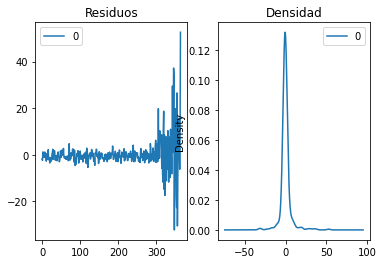

In [93]:
# Plot residual errors
residuals = pd.DataFrame(model_fit1.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuos", ax=ax[0])
residuals.plot(kind='kde', title='Densidad', ax=ax[1])
plt.show()

### Test Ljung Box

Test para probar incorrelación de los resiudos. 

* **Hipótesis**:
    * **H0**: Residuos incorrelacionados
    * **H1**: Residuos correlacionados.
    
* **P-value**:
    * p-value > 0.05: No rechazo H0 por lo que se puede sostener la hipótesis de residuos incorrelacionados
    * p-value <= 0.05: Rechazo la H0; por lo que se puede sostener que los residuos están correlacionados

In [94]:
from statsmodels.tsa.stattools import q_stat

test_lb = q_stat(acf(sdf.dropna()), nobs=10)

print('Valor del test: {}'.format(test_lb[0][0]))
print('p-value: {}'.format(test_lb[1][0]))

def test_ljung_box(serie,alpha):
    test = q_stat(serie, nobs=10)
    dkf, pv = test[0][0], test[1][0]
    
    if pv > alpha:
        print("El p-value ({}) es mayor que el alpha ({}).".format(pv,alpha))
        print("NO rechazo H0.")
        
    else:
        print("El p-value ({}) es menor que el alpha ({}).".format(pv,alpha))
        print("Rechazo H0.")
    
    return dkf, pv

test_ljung_box(acf(sdf.dropna()), alpha = 0.05)

Valor del test: 13.333333333333332
p-value: 0.0002607296328553169
El p-value (0.0002607296328553169) es menor que el alpha (0.05).
Rechazo H0.


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:469: RuntimeWarning: divide by zero encountered in true_divide
  np.cumsum((1. / (nobs - np.arange(1, len(x) + 1))) * x**2))


(13.333333333333332, 0.0002607296328553169)

### Test Jarque Bera

Test para probar la normalidad de los residuos. 

* **Hipótesis**:
    * **H0**: Residuos se distribuyen normalmente.
    * **H1**: No específica.
    
* **P-value**:
    * p-value > 0.05: No rechazo H0 por lo que se puede sostener la hipótesis de residuos normales.
    * p-value <= 0.05: Rechazo la H0; por lo que se desconoce la distribución de los residuos.

In [ ]:
from statsmodels.stats.stattools import jarque_bera

test_jb = jarque_bera(model_fit1.resid)

print('Valor del test: {}'.format(test_jb[0]))
print('p-value: {}'.format(test_jb[1]))

def test_jarque_bera(serie,alpha):
    test = jarque_bera(serie)
    dkf, pv = test[0], test[1]
    
    if pv > alpha:
        print("El p-value ({}) es mayor que el alpha ({}).".format(pv,alpha))
        print("NO rechazo H0.")
        
    else:
        print("El p-value ({}) es menor que el alpha ({}).".format(pv,alpha))
        print("Rechazo H0.")
    
    return dkf, pv

test_jarque_bera(model_fit1.resid, alpha = 0.05)

Valor del test: 7359.259989600171
p-value: 0.0
El p-value (0.0) es menor que el alpha (0.05).
Rechazo H0.


(7359.259989600171, 0.0)